<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/Tarea2_evolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bitstring

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random
import bitstring as bits
from sympy import *
import scipy, pylab

In [3]:
x = Symbol('x')
y = Symbol('y')

f1 = (x-1)**2 + (y-1)**4
f2 = (x+1)**2 + (y+1)**2

In [4]:
class Individuo():
    def __init__(self, x='', y=''):
      if x!='':
        self.f_x = float(x)
        self.f_y = float(y)
      else:
        self.f_x = round(random.uniform(-3, 3),2)
        self.f_y = round(random.uniform(-3, 3),2)
      self.cromosomas()

    def cromosomas(self):
        aux_f_x = bits.BitArray(float=self.f_x, length=32)
        aux_f_y = bits.BitArray(float=self.f_y, length=32)

        self.b_x = list(aux_f_x.bin)
        self.b_y = list(aux_f_y.bin)
 

    def fittnes(self, w1, w2):

      func = (w1 * f1) + (w2 * f2)

      r1_1 = ''.join(self.b_x)
      r1_2 = ''.join(self.b_y)

      r2_1 = bits.BitArray(bin=r1_1).float
      r2_2 = bits.BitArray(bin=r1_2).float

      result = func.subs([(x, r2_1), (y, r2_2)]).doit()
      return result
        

In [5]:
class Poblacion():
  p = []

  def __init__(self, n=''):
    self.p = []
    if n!='':
      for k in range(n):
        i=Individuo()
        self.p.append(i)


  def cruza(self, ind_1, ind_2):
    cro1_1 = ind_1.b_x
    cro1_2 = ind_1.b_y

    cro2_1 = ind_2.b_x
    cro2_2 = ind_2.b_y

    cruza1_x_top = cro1_1[:16]
    cruza1_x_bot = cro1_1[16:]

    cruza1_y_top = cro1_2[:16]
    cruza1_y_bot = cro1_2[16:]

    cruza2_x_top = cro2_1[:16]
    cruza2_x_bot = cro2_1[16:]

    cruza2_y_top = cro2_2[:16]
    cruza2_y_bot = cro2_2[16:]

    hijo_1_x = cruza1_x_top + cruza2_x_bot
    hijo_1_y = cruza1_y_top + cruza2_y_bot

    hijo_2_x = cruza2_x_top + cruza1_x_bot
    hijo_2_y = cruza2_y_top + cruza1_y_bot

    ch_1_x = hijo_1_x
    ch_1_y = hijo_1_y

    chs_1_x = ''.join(ch_1_x)
    chs_1_y = ''.join(ch_1_y)

    h1_2_1 = bits.BitArray(bin=chs_1_x)
    h1_2_2 = bits.BitArray(bin=chs_1_y)
      
    h1_3_1 = h1_2_1.float
    h1_3_2 = h1_2_2.float

    ch_2_x = hijo_2_x
    ch_2_y = hijo_2_y

    chs_2_x = ''.join(ch_2_x)
    chs_2_y = ''.join(ch_2_y)

    h2_2_1 = bits.BitArray(bin=chs_2_x)
    h2_2_2 = bits.BitArray(bin=chs_2_y)
      
    h2_3_1 = h2_2_1.float
    h2_3_2 = h2_2_2.float

    hijo_1 = Individuo(h1_3_1, h1_3_2)
    hijo_2 = Individuo(h2_3_1, h2_3_2)

    return hijo_1, hijo_2 


  def mutacion(self, ind_1):
    index = random.randint(0, 31)

    c_aux_1 = ind_1.b_x[index]
    c_aux_2 = ind_1.b_y[index]

    if c_aux_1=='0':
      ind_1.b_x[index]='1'
    else:
      ind_1.b_x[index]='0'

    if c_aux_2=='0':
      ind_1.b_y[index]='1'
    else:
      ind_1.b_y[index]='0'


In [6]:
w1 = 0.5
w2 = 0.5

pob_i = Poblacion(n=40)

for m in range(10):
  pob_n = Poblacion()
  pob_aux = Poblacion()


  #seleccionar los que se van a reproducir
  for i in range(0, len(pob_i.p), 2):
    if pob_i.p[i].fittnes(w1, w2)<= pob_i.p[i+1].fittnes(w1, w2):
      pob_aux.p.append(pob_i.p[i])
    else:
      pob_aux.p.append(pob_i.p[i+1])   

  #quenes serán padres
  pad_1 = Individuo()
  pad_2 = Individuo()

  for j in range(0, len(pob_aux.p), 2):
    pad_1 = pob_aux.p[j]
    pad_2 = pob_aux.p[j+1]

    pob_n.p.append(pad_1)
    pob_n.p.append(pad_2)

    #cruza
    h_1, h_2 = pob_n.cruza(pad_1, pad_2)

    #mutacion
    if random.uniform(0, 1)<0.1:
      pob_n.mutacion(h_1)

    if random.uniform(0, 1)<0.1:
      pob_n.mutacion(h_2)

    pob_n.p.append(h_1)
    pob_n.p.append(h_2)
  
#  print(len(pob_n.p))
#  print("*****")
#  pob_i.p = pob_n.p


Text(0, 0.5, 'f2')

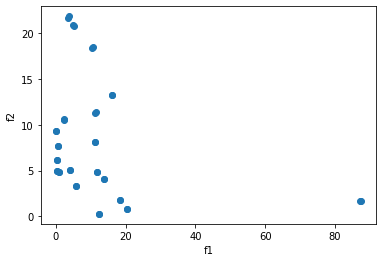

In [7]:
g1 = []
g2 = []

for i in pob_n.p:

  f1s = f1.subs([ (x, i.f_x), (y, i.f_y) ] ).doit()
  f2s = f2.subs([ (x, i.f_x), (y, i.f_y) ] ).doit()

  g1.append(f1s)    
  g2.append(f2s)  


ax = pylab.subplot(111)
ax.scatter(g1, g2)
ax.figure.show()

ax.set_xlabel('f1')
ax.set_ylabel('f2')